C.13, C.14, C.15, C.16, C.17, C.19, C.20

<h1> Solutions in Summary</h1>

In [1]:
import numpy as np

# General Multidimensional Newton's Method
def multidimensional_newton(funcs, jacobian, initial_guess, tol=1e-10):
    """  
    funcs: list of functions, the system of nonlinear equations
    jacobian: function that computes the Jacobian matrix
    initial_guess: initial guess for the variables
    tolerance: tolerance for the convergence criterion
    """
    # Initialize the guess
    x_k = np.array(initial_guess)
    
    while True:
        # Evaluate the functions
        F_k = np.array([func(*x_k) for func in funcs])
        
        # Evaluate the Jacobian matrix
        J_k = jacobian(*x_k)
        
        # Check if the Jacobian is near singular
        if np.linalg.cond(J_k) > 1 / np.finfo(float).eps:
            # If the Jacobian is near singular, Newton's method may not converge
            print(f"Jacobian is singular at the initial guess. Newton's method may not converge with the initial guess of {initial_guess}.")
            return None
        
        # Solve the system J_k * b = -F to find delta
        b = np.linalg.solve(J_k, -F_k)
        
        # Update the guess
        x_k += b
        
        # Check for convergence
        if np.linalg.norm(b) < tol:
            break
        
    return x_k

#####################################################################

# C. 13 example
def f(x, y):
    return x * np.sin(y)
def g(x, y):
    return np.cos(x) + np.sin(y**2)
def jacobian(x, y):
    return np.array([[np.sin(y), x * np.cos(y)],
                     [-np.sin(x), 2 * y * np.cos(y**2)]])
funcs = [f, g]
initial = [np.pi/2, np.pi]
sol = multidimensional_newton(funcs, jacobian, initial)
print(f"C.13 example: {sol} with initial guess of {initial}")
######################################################################

# C. 15 example
def f1(x, y):
    return 1 + x**2 - y**2 + np.exp(x)*np.cos(y)              
def g1(x, y):                   
    return 2*x*y + np.exp(x)*np.sin(y)
# Define the Jacobian matrix of F
def jacobian1(x, y):
    return np.array([[2*x + np.exp(x)*np.cos(y), -2*y - np.exp(x)*np.sin(y)], 
                     [2*y + np.exp(x)*np.sin(y), 2*x + np.exp(x)*np.cos(y)]])
funcs1 = [f1, g1]
initial1 = [1.0, 1.0]
sol1 = multidimensional_newton(funcs1, jacobian1, initial1)
print(f"C.15 example: {sol1} with initial guess of {initial1}")
####################################################################

# C.17 example
def f(x, y, z):
    return x**2 + y**2 + z**2 -100
def g(x, y, z):
    return x*y*z - 1
def h(x, y, z):
    return x - y - np.sin(z)
def Jacobian(x, y, z):
    return np.array([[2*x, 2*y, 2*z],
                     [y*z, x*z, x*y],
                     [1, -1, -np.cos(z)]])   
F_new = [f, g, h]
initial = [1.0, 1.0, np.pi]
sol = multidimensional_newton(F_new, Jacobian, initial)
print(f"C.17 example: {sol} with initial guess of {initial}")
######################################################################

#C.19 example
alpha, beta, gamma, delta = 1, 0.05, 0.01, 1
def f1(x, y):
    return alpha * x - beta * x * y
def f2(x, y):
    return delta * y + gamma * x * y
def jacobian(x, y):
    return np.array([[alpha - beta * y, -beta * x],
                     [gamma * y, delta + gamma * x]])

F = [f1, f2]
initial0 = [0.0, 0.0]
initial1 = [0.0, alpha/beta]
initial2 = [-delta/gamma, 0.0]

# substitute y = alpha / beta in the second equation
initial3 = [-delta / (gamma + (gamma * alpha / beta)), alpha/beta]

print("\nC.19 example:")
sol0 = multidimensional_newton(F, jacobian, initial0)
sol1 = multidimensional_newton(F, jacobian, initial1)
sol2 = multidimensional_newton(F, jacobian, initial2)
sol3 = multidimensional_newton(F, jacobian, initial3)

print("Solution:", sol0, "with initial guess of", initial0)
print("Solution:", sol1, "with initial guess of", initial1)
print("Solution:", sol2, "with initial guess of", initial2)
print("Solution:", sol3, "with initial guess of", initial3)
#######################################################################

# C.20 example
def f20(x, y, z):
    return -0.1*x*y - x
def g20(x, y, z):
    return -x + 0.9 * y
def h20(x, y, z):
    return np.cos(y) - x*z

def Jaco(x, y ,z):
    return np.array([[-0.1*y - 1, -0.1*x, 0],
                     [-1, 0.9, 0],
                     [-z, -np.sin(y), -x]])
F = [f20, g20, h20]
initial0 = [1.0, -10.0, 1.0]
sol0 = multidimensional_newton(F, Jaco, initial0)
print(f"\nC.20 example: {sol0} with initial guess of {initial0}")


C.13 example: [1.12596989 3.14159265] with initial guess of [1.5707963267948966, 3.141592653589793]
C.15 example: [-0.29316269  1.17265982] with initial guess of [1.0, 1.0]
C.17 example: [-7.06104719 -7.08104601  0.02000016] with initial guess of [1.0, 1.0, 3.141592653589793]

C.19 example:
Jacobian is singular at the initial guess. Newton's method may not converge with the initial guess of [0.0, 20.0].
Jacobian is singular at the initial guess. Newton's method may not converge with the initial guess of [-100.0, 0.0].
Solution: [0. 0.] with initial guess of [0.0, 0.0]
Solution: None with initial guess of [0.0, 20.0]
Solution: None with initial guess of [-100.0, 0.0]
Solution: [-100.   20.] with initial guess of [-4.761904761904762, 20.0]

C.20 example: [ -9.         -10.           0.09323017] with initial guess of [1.0, -10.0, 1.0]


<h1>C.13 - C.14</h1>

In [3]:
from sympy import symbols, sin, cos, diff

# Define the symbols
x, y = symbols('x y')

# Define the functions f(x, y) and g(x, y)
f = x * sin(y)
g = cos(x) + sin(y**2)

# Compute the partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)
g_x = diff(g, x)
g_y = diff(g, y)

# The Jacobian matrix entries
jacobian_matrix = ([f_x, f_y], 
                   [g_x, g_y])
print(jacobian_matrix)

([sin(y), x*cos(y)], [-sin(x), 2*y*cos(y**2)])


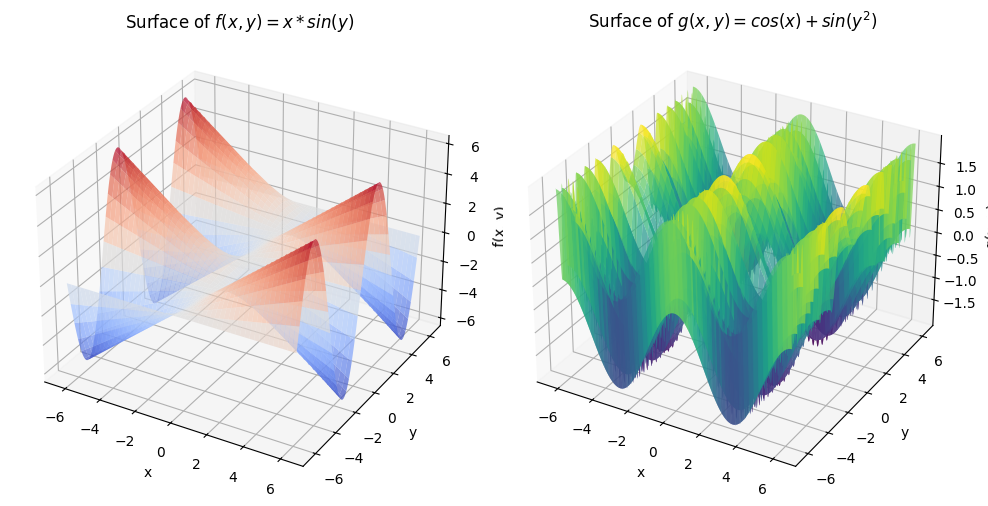

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def f(x, y):
    return x * np.sin(y)

def g(x, y):
    return np.cos(x) + np.sin(y**2)

# Create a grid of x and y values
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.linspace(-2 * np.pi, 2 * np.pi, 400)
X, Y = np.meshgrid(x, y)

# Compute Z values for both functions
Z_f = f(X, Y)
Z_g = g(X, Y)

# Plot the surface for f(x, y)
fig = plt.figure(figsize=(10, 5))

# Plot for f(x, y)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z_f, cmap=plt.cm.coolwarm, alpha=0.7)
ax1.set_title('Surface of $f(x, y) = x * sin(y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# Plot for g(x, y)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z_g, cmap=plt.cm.viridis, alpha=0.7)
ax2.set_title('Surface of $g(x, y) = cos(x) + sin(y^2)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('g(x, y)')

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
import numpy as np

# Define the function F(x, y) = [f(x, y), g(x, y)]
def F(x, y):
    return np.array([x * np.sin(y), np.cos(x) + np.sin(y**2)])

# Define the Jacobian matrix of F
def J(x, y):
    return np.array([[np.sin(y), x * np.cos(y)], 
                     [-np.sin(x), 2 * y * np.cos(y**2)]])


def newtons_method(F, J, x0, y0, tol):
    x, y = x0, y0
    
    # initialize the step size vector b with infinity to enter the while loop
    b = np.array([np.inf, np.inf]) 
    
    # iterating until b is smaller than the tolerance
    while np.linalg.norm(b)>=tol:
        
        # solve the linear system J(x, y) * b = -F(x, y)
        b = np.linalg.solve(J(x,y), -F(x,y))
        
        # update the guesses for x and y
        x, y = x + b[0], y + b[1]
    
    return x, y

# Initial guess
x0, y0 = np.pi/2, np.pi

# Apply Newton's method
solution = newtons_method(F, J, x0, y0, 1e-6)

# Print the solution
print("Solution: x = {:}, y = {:}".format(solution[0], solution[1]))

# Initial guess
x1, y1 = 1.0, 1.0

# Apply Newton's method
solution1 = newtons_method(F, J, x1, y1, 1e-6)

# Print the solution
print("Solution: x = {:}, y = {:}".format(solution1[0], solution1[1]))

Solution: x = 1.1259698864749177, y = 3.141592653589793
Solution: x = 1.5707963267948966, y = -6.64410208813345e-25


<h1>C.15 - C.16</h1>

In [6]:
from sympy import symbols, sin, cos, diff, exp

# Define the symbols
x, y = symbols('x y')

# Define the functions f(x, y) and g(x, y)
f = 1 + x**2 - y**2 + exp(x)*cos(y)
g = 2*x*y + exp(x)*sin(y)

# Compute the partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)
g_x = diff(g, x)
g_y = diff(g, y)

# The Jacobian matrix entries
jacobian_matrix = ([f_x, f_y], 
                   [g_x, g_y])
print(jacobian_matrix)

([2*x + exp(x)*cos(y), -2*y - exp(x)*sin(y)], [2*y + exp(x)*sin(y), 2*x + exp(x)*cos(y)])


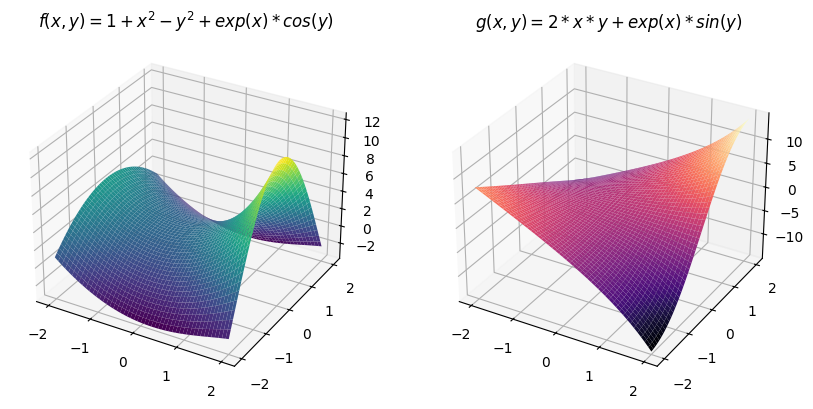

In [7]:
def f(x, y):
    return 1 + x**2 - y**2 + np.exp(x) * np.cos(y)

def g(x, y):
    return 2 * x * y + np.exp(x) * np.sin(y)

# Create a grid of x, y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Calculate z values for the functions f and g
z_f = f(x, y)
z_g = g(x, y)

# Create the plot
fig = plt.figure(figsize=(10, 5))

# Plot f(x, y)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z_f, cmap='viridis', edgecolor='none')
ax1.set_title('$f(x, y) = 1 + x^2 - y^2 + exp(x) * cos(y)$')

# Plot g(x, y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z_g, cmap='magma', edgecolor='none')
ax2.set_title('$g(x, y) = 2 * x * y + exp(x) * sin(y)$')

# Show the plot
plt.show()


In [8]:
# Define the function F(x, y) = [f(x, y), g(x, y)]
def F(x, y):
    return np.array([1 + x**2 - y**2 + np.exp(x)*np.cos(y), 2*x*y + np.exp(x)*np.sin(y)])

# Define the Jacobian matrix of F
def J(x, y):
    return np.array([[2*x + np.exp(x)*np.cos(y), -2*y - np.exp(x)*np.sin(y)], 
                     [2*y + np.exp(x)*np.sin(y), 2*x + np.exp(x)*np.cos(y)]])

# Initial guess
x0, y0 = 1, 1

# Apply Newton's method
solution = newtons_method(F, J, x0, y0, 1e-6)

# Print the solution
print("Solution: x = {:}, y = {:}".format(solution[0], solution[1]))

Solution: x = -0.2931626870672417, y = 1.1726598176735787


In [9]:

# C. 15 example, where the number of functions is 2
# General Multidimensional Newton's Method
def multidimensional_newton(funcs, jacobian, initial_guess, tol=1e-10):
# Initialize the guess
    x_k = np.array(initial_guess)
    
    while True:
        # Evaluate the functions
        F_k = np.array([func(*x_k) for func in funcs])
        
        # Evaluate the Jacobian matrix
        J_k = jacobian(*x_k)
        
        # Check if the Jacobian is near singular
        if np.linalg.cond(J_k) > 1 / np.finfo(float).eps:
            # If the Jacobian is near singular, Newton's method may not converge
            print("Jacobian is singular at the initial guess. Newton's method may not converge.")
            return None
        
        # Solve the system J_k * b = -F to find delta
        b, residuals, rank, s = np.linalg.lstsq(J_k, -F_k, rcond=None)
        
        # If the system is underdetermined or overdetermined, no solution was found
        if residuals.size > 0 and np.any(residuals > tol):
            print("The system does not have a solution.")
            return None
        
        if rank < J_k.shape[0]:
            print("Jacobian matrix is rank deficient at the initial guess, and the Newton's method may not converge.")
        
        # Update the guess
        x_k += b
        
        # Check for convergence
        if np.linalg.norm(b) < tol:
            break
        
    return x_k

# C. 15 example, where the number of functions is 2
def f1(x, y):
    return 1 + x**2 - y**2 + np.exp(x)*np.cos(y)
                     
def g1(x, y):                   
    return 2*x*y + np.exp(x)*np.sin(y)

F = [f1, g1]
initial = [1.0, 1.0]
sol = multidimensional_newton(F, J, initial)
print("Solution:", sol)

Solution: [-0.29316269  1.17265982]


<h1>C.17</h1>

In [10]:
from sympy import symbols, sin, cos, diff, exp

# Define the symbols
x, y, z = symbols('x y z')

f = x**2 + y**2 + z**2 -100
g = x*y*z - 1
h = x - y -sin(z)

# Compute the partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)
f_z = diff(f, z)
g_x = diff(g, x)
g_y = diff(g, y)
g_z = diff(g, z)
h_x = diff(h, x)
h_y = diff(h, y)
h_z = diff(h, z)

# The Jacobian matrix entries
jacobian_matrix = ([f_x, f_y, f_z], 
                   [g_x, g_y, g_z],
                   [h_x, h_y, h_z])
print(jacobian_matrix)

([2*x, 2*y, 2*z], [y*z, x*z, x*y], [1, -1, -cos(z)])


In [11]:
def f(x, y, z):
    return x**2 + y**2 + z**2 -100

def g(x, y, z):
    return x*y*z - 1

def h(x, y, z):
    return x - y - np.sin(z)

def Jacobian(x, y, z):
    return np.array([[2*x, 2*y, 2*z],
                     [y*z, x*z, x*y],
                     [1, -1, -np.cos(z)]])
    
F_new = [f, g, h]
initial = np.array([1.0, 1.0, np.pi])
sol = multidimensional_newton(F_new, Jacobian, initial)
print(f"Solution: {sol}")

Solution: [-7.06104719 -7.08104601  0.02000016]


<h1>C.19</h1>

In [12]:
# Parameters for the system
alpha, beta, gamma, delta = 1, 0.05, 0.01, 1

# Defining the functions for the system
def f1(x, y):
    return alpha * x - beta * x * y

def f2(x, y):
    return delta * y + gamma * x * y

# Defining the Jacobian matrix for the system
def jacobian(x, y):
    return np.array([[alpha - beta * y, -beta * x],
                     [gamma * y, delta + gamma * x]])
    
F = [f1, f2]
initial0 = [0.0, 0.0]
initial1 = [0.0, alpha/beta]
initial2 = [-delta/gamma, 0.0]

# substitute y = alpha / beta in the second equation
initial3 = [-delta / (gamma + (gamma * alpha / beta)), alpha/beta]
sol0 = multidimensional_newton(F, jacobian, initial0)
sol1 = multidimensional_newton(F, jacobian, initial1)
sol2 = multidimensional_newton(F, jacobian, initial2)
sol3 = multidimensional_newton(F, jacobian, initial3)

print("Solution:", sol0)
print("Solution:", sol1)
print("Solution:", sol2)
print("Solution:", sol3)

Jacobian is singular at the initial guess. Newton's method may not converge.
Jacobian is singular at the initial guess. Newton's method may not converge.
Solution: [0. 0.]
Solution: None
Solution: None
Solution: [-100.   20.]


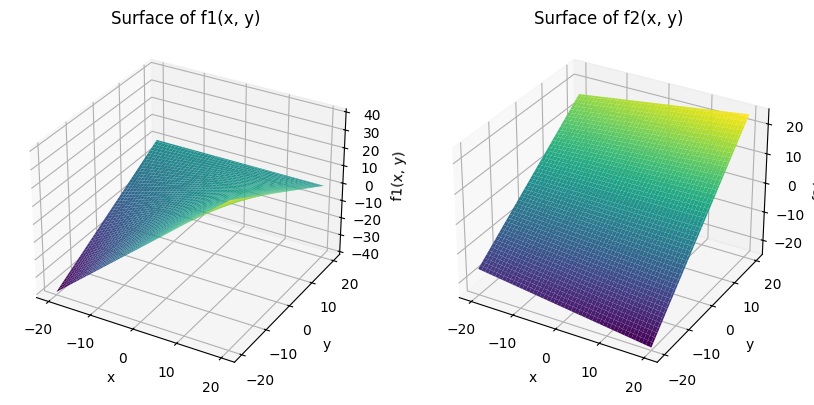

In [13]:
# Create a grid of x, y values
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Plot the functions
fig = plt.figure(figsize=(10, 5))

# First function plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('Surface of f1(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1(x, y)')

# Second function plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('Surface of f2(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2(x, y)')

# Show the plot
plt.show()

<h1>C.20</h1>

In [46]:
def f20(x, y, z):
    return -0.1*x*y - x

def g20(x, y, z):
    return -x + 0.9 * y

def h20(x, y, z):
    return np.cos(y) - x*z

def Jaco(x, y ,z):
    return np.array([[-0.1*y - 1, -0.1*x, 0],
                     [-1, 0.9, 0],
                     [-z, -np.sin(y), -x]])
    

F = [f20, g20, h20]
initial0 = [1.0, -10.0, 1.0]
sol0 = multidimensional_newton(F, Jaco, initial0)
print(sol0)

initial1 = [0.1, 0.1/0.9, np.cos(0.1/0.9)/0.1]
sol1 = multidimensional_newton(F, Jaco, initial1)
print(sol1)

[ -9.         -10.           0.09323017]
Jacobian is singular at the initial guess. Newton's method may not converge with the initial guess of [0.1, 0.11111111111111112, 9.93833508538892].
None
